About Dataset:

Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/Users/hanh/OneDrive/Python Resources/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

1. Identification & Basic Info

car_ID – A unique identifier for each car entry.

symboling – Risk factor rating assigned by the insurance industry. Higher numbers may indicate higher risk.

CarName – Brand and model of the car.

2. Fuel & Engine Characteristics

fueltype – Type of fuel used (e.g., gas, diesel).

aspiration – Type of air intake method for the engine (e.g., turbocharged or standard).

enginetype – Design or configuration of the engine (e.g., dohc, ohcv, rotor).

cylindernumber – Number of cylinders in the engine (numeric or as text like “four”, “six”).

enginesize – Engine displacement volume in cubic centimeters (cc).

fuelsystem – Fuel delivery method (e.g., mpfi – multi-point fuel injection, 2bbl – 2-barrel carburetor).

boreratio – Ratio of cylinder bore diameter to stroke length.

stroke – Distance the piston travels in the cylinder.

compressionratio – Ratio of the volume of the cylinder when the piston is at the bottom vs. top of its stroke.

horsepower – Power output of the engine.

peakrpm – Engine revolutions per minute at maximum horsepower.

3. Body & Structure

doornumber – Number of doors (two or four).

carbody – Body style of the vehicle (e.g., sedan, hatchback, wagon).

drivewheel – Drivetrain type (e.g., fwd – front-wheel drive, rwd – rear-wheel drive, 4wd – four-wheel drive).

enginelocation – Position of the engine (front or rear).

wheelbase – Distance between the centers of the front and rear wheels (inches or mm).

carlength – Length of the car.

carwidth – Width of the car.

carheight – Height of the car.

curbweight – Total weight of the car without passengers or cargo.

4. Fuel Economy

citympg – Miles per gallon the car can achieve in city driving conditions.

highwaympg – Miles per gallon the car can achieve in highway driving conditions.

5. Target Variable

price – Selling price of the car (target variable for prediction).

Data Cleaning

- Check data types
- Check missing values
- Check duplicates
- Check misspelling

In [7]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# Check missing values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# Check duplicates
df.duplicated().sum()

0

In [10]:
# Check unique values
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
# 1. Extract brand (first word in CarName)
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# 2. Fix spelling errors
df['brand'] = df['brand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

# 3. Optional: strip spaces
df['brand'] = df['brand'].str.strip()

# 4. Check unique cleaned brands
print(df['brand'].unique())


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


EDA Numerical Value

- Data Distribution, Histogram
- Outliers Detection
- Scatter plot and Correlation 

In [14]:
numerical_data = df.drop(columns='car_ID').select_dtypes(include=['int64', 'float64'])
numerical_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [16]:
# Calculate coefficient of variance
cv_all = numerical_data.std() / numerical_data.mean()
cv_all_percent = cv_all * 100

print(cv_all_percent)  # percentage


symboling           149.291169
wheelbase             6.097594
carlength             7.088389
carwidth              3.254856
carheight             4.548213
curbweight           20.374361
enginesize           32.813469
boreratio             8.134040
stroke                9.633090
compressionratio     39.162199
horsepower           37.980483
peakrpm               9.306815
citympg              25.940794
highwaympg           22.394049
price                60.171925
dtype: float64


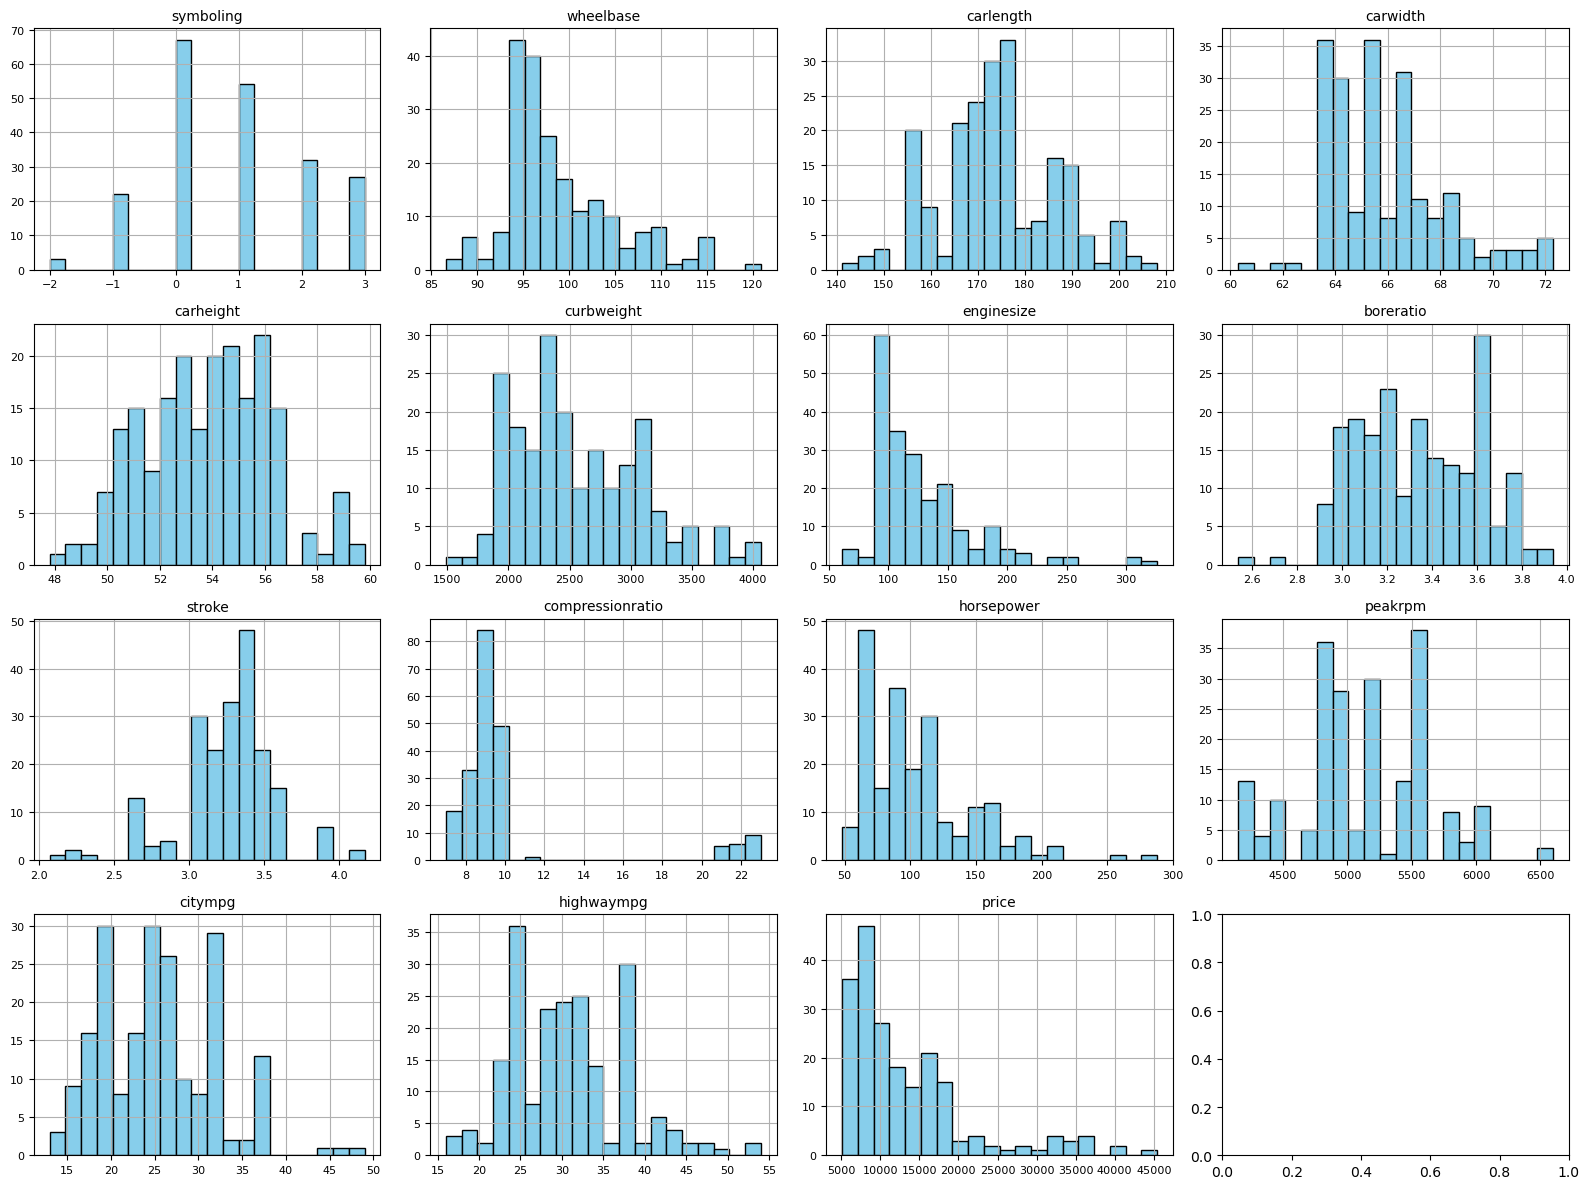

In [17]:
# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # 4x4 grid
axes = axes.flatten()

# Loop through variables
for i, col in enumerate(numerical_data.columns):
    numerical_data[col].hist(ax=axes[i], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis="x", labelsize=8)
    axes[i].tick_params(axis="y", labelsize=8)

plt.tight_layout()
plt.show()

In [18]:
# Detect outliers in the target
mean_price = np.mean(df['price'])
stdv_price = np.std(df['price'])
outlier_price = df[((df['price']-mean_price)/stdv_price) > 3]
outlier_price.T

,16,73,74
car_ID,17,74,75
symboling,0,0,1
CarName,bmw x5,buick century special,buick regal sport coupe (turbo)
fueltype,gas,gas,gas
aspiration,std,std,std
doornumber,two,four,two
carbody,sedan,sedan,hardtop
drivewheel,rwd,rwd,rwd
enginelocation,front,front,front
wheelbase,103.5,120.9,112.0


We can group those car into luxury brand, it maybe helpful later.

In [20]:
numerical_data.corrwith(numerical_data['price']).sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
dtype: float64

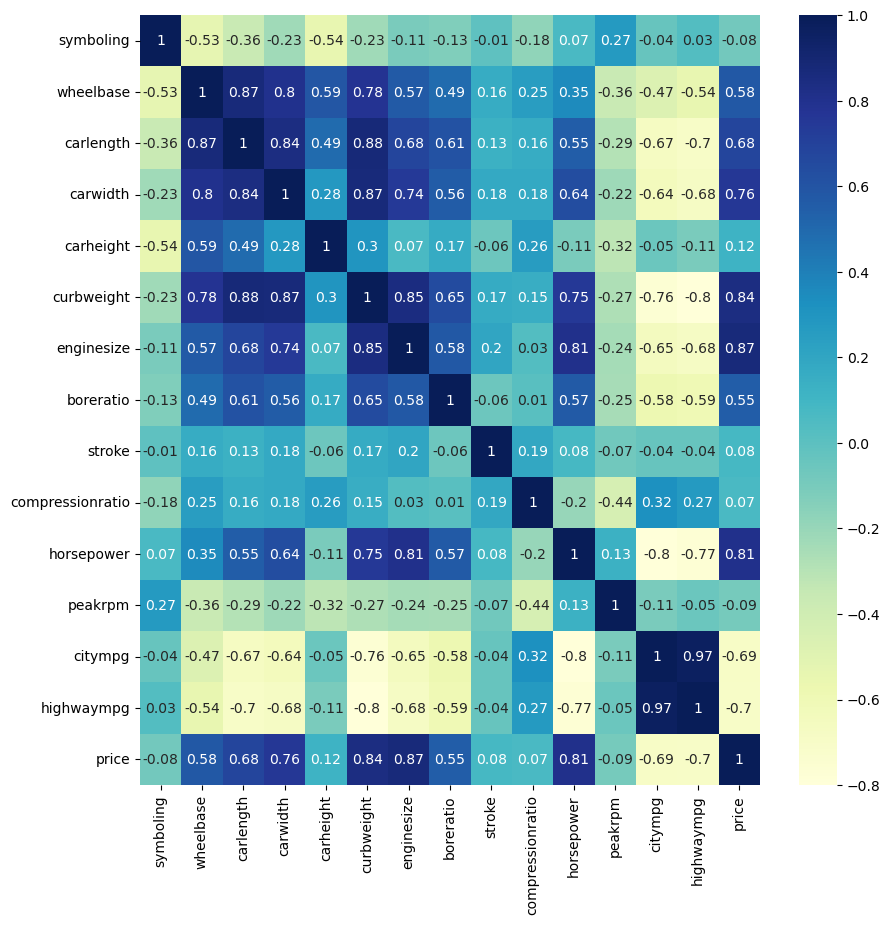

In [21]:
correlation = round(numerical_data.corr(),2)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='YlGnBu', annot=True)
plt.show()

- highwaympg, citympg HIGH NEGATIVE CORRELATION means it is fuel-efficient, usually cheaper car with less powered engine (choose 1 since they have high correlation)
- peakrpm, symboling, compressionratio, stroke, carheight have negiligible impact on the price. (Ignore)
- boreratio, wheelbase MODERATE POSITIVE CORRELATION have some multicollinearity
- carlength, carwidth, horsepower, curbweight, enginesize SRONG POSITIVE CORRELATION have some multicollinearity
- Bigger car, sronger car tend to have higher price!!!

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = numerical_data
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


             Feature          VIF
0          symboling     2.543383
1          wheelbase  2296.810858
2          carlength  1919.961993
3           carwidth  2832.341655
4          carheight   929.478701
5         curbweight   408.755795
6         enginesize    93.014977
7          boreratio   296.762154
8             stroke   139.767452
9   compressionratio    17.277978
10        horsepower    67.615248
11           peakrpm   227.384803
12           citympg   445.979602
13        highwaympg   513.763268
14             price    24.106849


VIF > 10 → severe multicollinearity
Drop car_ID, symboling, carlength, carwidth, carheight, peakrpm, compressionratio, stroke
Keep curbweight, horsepower, enginesize
Avg highway and city

<Axes: xlabel='enginesize', ylabel='price'>

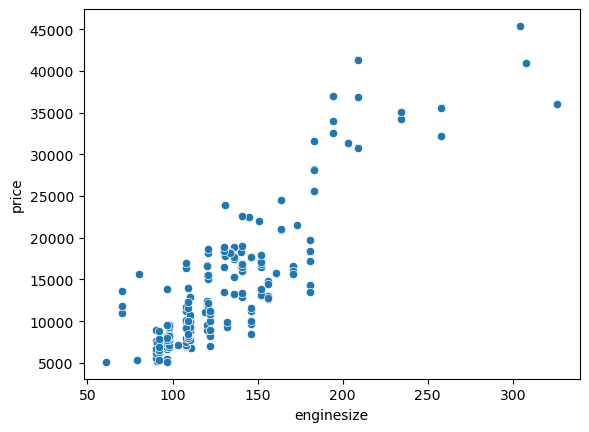

In [25]:
sns.scatterplot(x=numerical_data['enginesize'], y=numerical_data['price'])

<Axes: xlabel='curbweight', ylabel='price'>

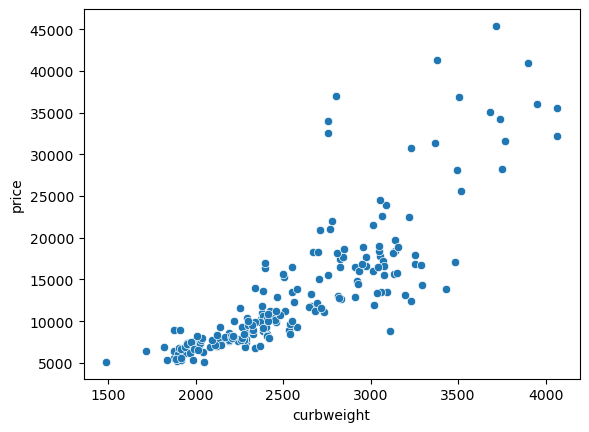

In [26]:
sns.scatterplot(x='curbweight', y='price', data=numerical_data)

<Axes: xlabel='horsepower', ylabel='price'>

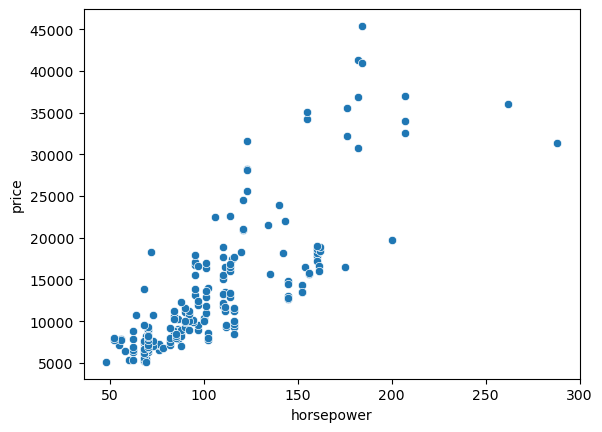

In [27]:
sns.scatterplot(x=numerical_data['horsepower'], y=numerical_data['price'])

EDA Categorical Data

In [29]:
category = df.select_dtypes(include='object')
category

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().tail(18))



--- CarName ---
CarName
mitsubishi lancer                  1
mitsubishi mirage                  1
buick regal sport coupe (turbo)    1
jaguar xk                          1
buick century special              1
buick skylark                      1
buick opel isuzu deluxe            1
buick skyhawk                      1
buick century                      1
buick century luxus (sw)           1
buick electra 225 custom           1
mazda glc custom                   1
mazda glc custom l                 1
mazda glc 4                        1
mazda rx2 coupe                    1
maxda glc deluxe                   1
maxda rx3                          1
volvo 246                          1
Name: count, dtype: int64

--- fueltype ---
fueltype
gas       185
diesel     20
Name: count, dtype: int64

--- aspiration ---
aspiration
std      168
turbo     37
Name: count, dtype: int64

--- doornumber ---
doornumber
four    115
two      90
Name: count, dtype: int64

--- carbody ---
carbody
sedan        

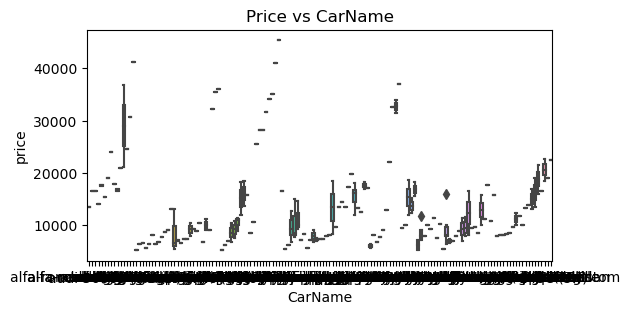

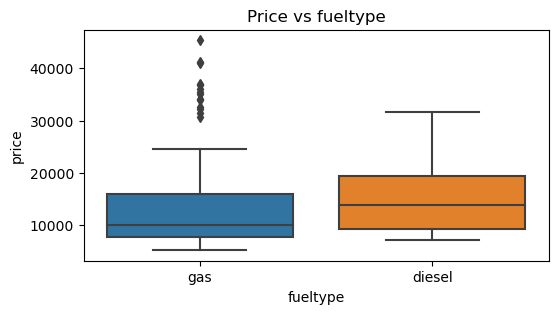

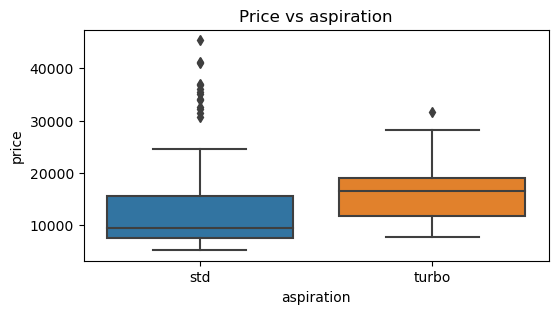

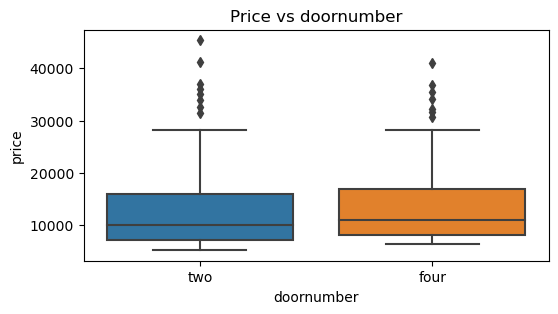

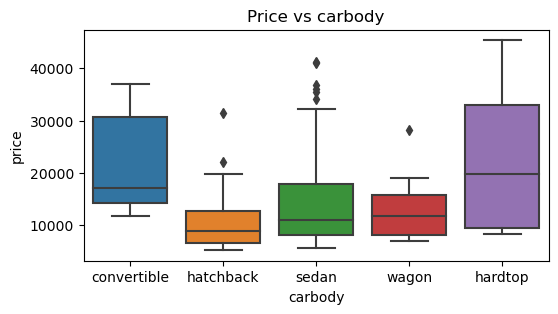

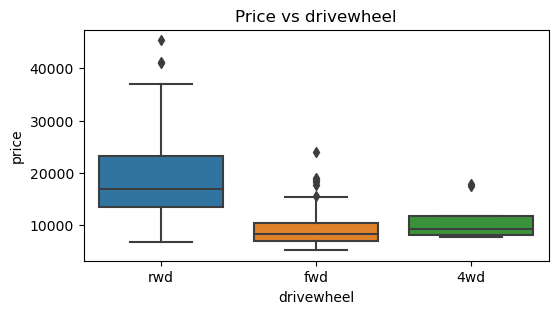

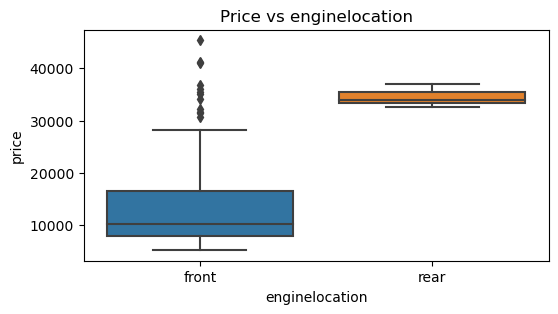

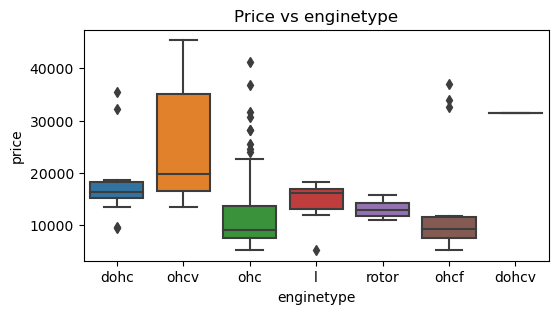

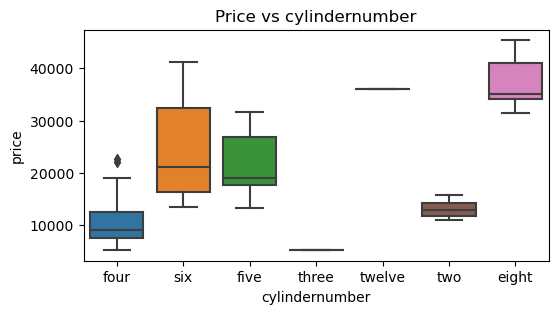

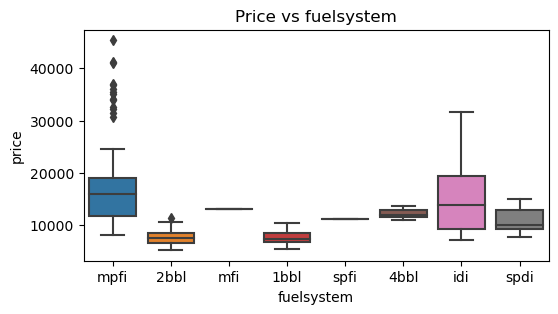

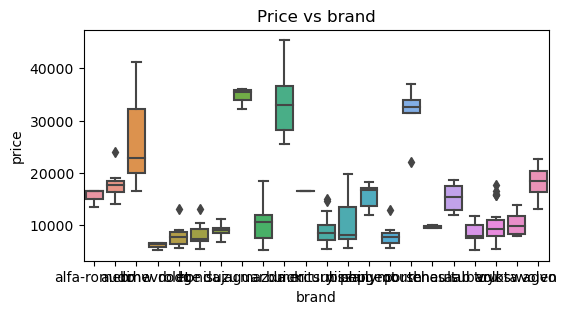

In [31]:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
    plt.show()


Diesel car tends to have higher price but gas car consists those luxurious car.
Turbo car tends to have higher price but std car consists those luxurious car.
Hardtop and convertible tend to have higher price.
Rear drive wheel tends to have higher price.
Front and rear engine data is too imbalanced to conclude.


<Axes: xlabel='brand', ylabel='price'>

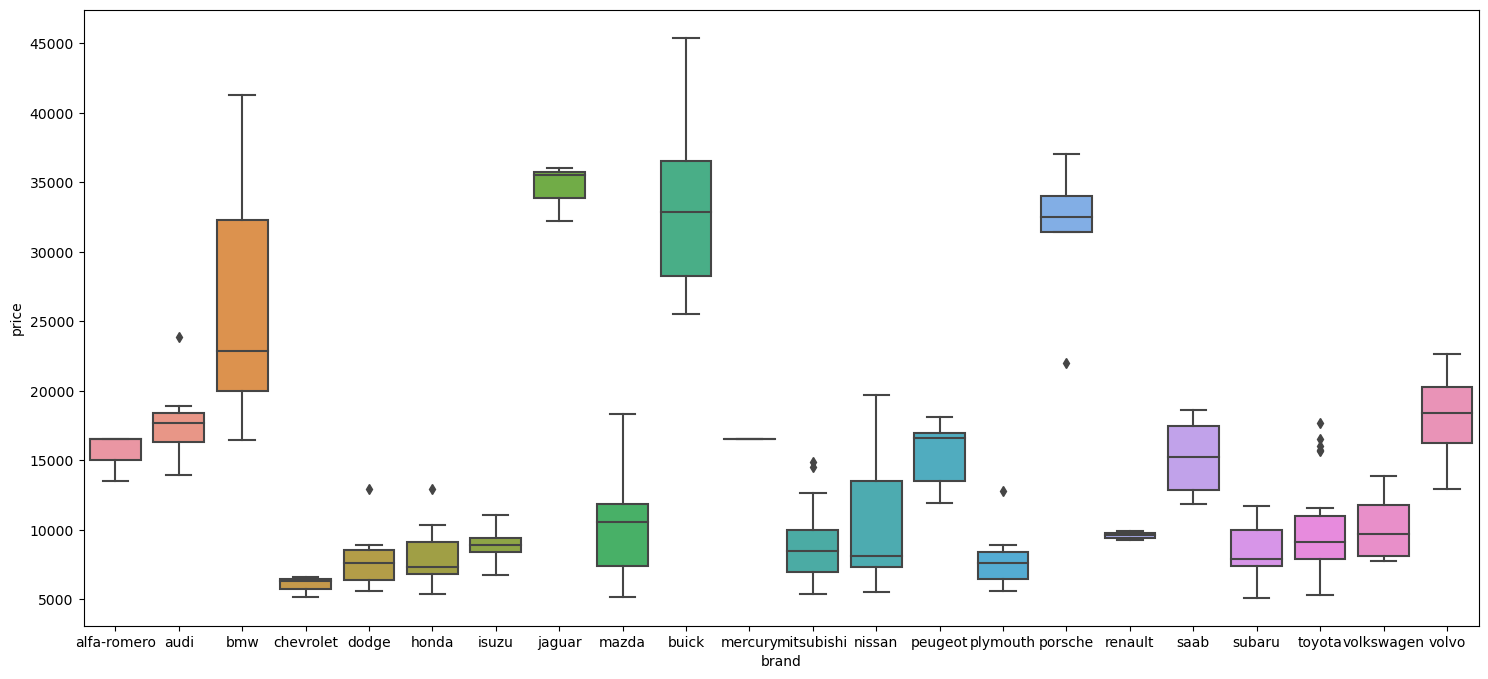

In [33]:
plt.figure(figsize=(18,8))
sns.boxplot(x='brand', y='price', data=df)

In [98]:
# Grouping to reduce overfitting
df['avg_mpg'] = (df['highwaympg'] + df['citympg'])/2
df['carbody'] = df['carbody'].replace(['hardtop', 'convertible'], 'other')
df['drivewheel'] = df['drivewheel'].replace('4wd', 'fwd')
mapping = {
    'dohcv': 'other',
    'rotor': 'other'
}

df['enginetype_grouped'] = df['enginetype'].replace(mapping)

# Define the mapping
map = {
    'two': 'other',
    'three': 'other',
    'twelve': 'other',
}

# Apply mapping
df['cyl_grouped'] = df['cylindernumber'].replace(map)

df['fuelsystem'] = df['fuelsystem'].replace(['spdi', '4bbl', 'mfi', 'spfi'], 'other')
df['brand_grouped'] = df['brand'].replace(['jaguar', 'porsche'], 'luxury')
df['brand_grouped'] = df['brand_grouped'].replace(['renault','mercury'], 'other')

In [116]:
# Define X
X = df.drop(columns=['price', 'car_ID', 'symboling', 'carlength', 'carwidth', 'carheight',
                             'peakrpm', 'compressionratio', 'stroke', 'highwaympg', 'citympg', 'CarName',
                             'doornumber', 'enginelocation', 'wheelbase', 'brand', 'cylindernumber', 'enginetype'])
y = df['price']
y_log = np.log(y)

In [118]:
# List of numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


Numeric: ['curbweight', 'enginesize', 'boreratio', 'horsepower', 'avg_mpg']
Categorical: ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'fuelsystem', 'enginetype_grouped', 'cyl_grouped', 'brand_grouped']


In [120]:
# Preprocess pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])


In [140]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)


In [158]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', Ridge(alpha=0.5))
])


In [160]:
model.fit(X_train, y_train_log)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['curbweight', 'enginesize',
                                                   'boreratio', 'horsepower',
                                                   'avg_mpg']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'fuelsystem',
                                                   'enginetype_grouped',
                                                   'cyl_grouped',
                                                   'brand_grouped'])])),
                ('regressor', Ridge(alpha=0.5))])

In [162]:
y_pred_log = model.predict(X_test)
# Convert log predictions back to price
y_pred = np.exp(y_pred_log)

# Convert y_test_log back to original price for comparison
y_test = np.exp(y_test_log)


In [164]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 2626.3412869338163
R² Score: 0.9126258267745447


In [166]:
# Residuals
residuals = y_test - y_pred

# Absolute errors
abs_errors = np.abs(residuals)

# Put into DataFrame for inspection
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Residual": residuals,
    "AbsError": abs_errors
})

# Sort by largest error
results_sorted = results.sort_values(by="AbsError", ascending=False)

print(results_sorted.head(10))  # show top 10 biggest misses

        Actual     Predicted     Residual     AbsError
16   41315.000  33104.984136  8210.015864  8210.015864
69   28176.000  34373.416027 -6197.416027  6197.416027
9    17859.167  22935.135639 -5075.968639  5075.968639
67   25552.000  30560.439035 -5008.439035  5008.439035
73   40960.000  36154.530571  4805.469429  4805.469429
202  21485.000  17859.777140  3625.222860  3625.222860
65   18280.000  14746.620371  3533.379629  3533.379629
194  12940.000  16305.414953 -3365.414953  3365.414953
68   28248.000  31458.317056 -3210.317056  3210.317056
101  13499.000  16573.334386 -3074.334386  3074.334386
